<a href="https://colab.research.google.com/github/Zivilevs/Data_Science_Projects/blob/main/randomForest_cancerdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest classification

Breast cancer dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']


In [3]:

X = df[cancer_data.feature_names].values
y = df['target'].values

In [4]:
print('data dimensions', X.shape)

data dimensions (569, 30)


## Build Model

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)  # test_size default is 0.25

In [8]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.958041958041958


Let's compare with Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

decision tree accuracy: 0.9090909090909091


## Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
 param_grid = {
    
    'n_estimators': [10, 25, 50, 75, 100],
 }

In [16]:
rf = RandomForestClassifier()

gs = GridSearchCV(rf, param_grid, cv=5)

In [18]:
gs.fit(X,y)
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)

Best parameters: {'n_estimators': 75}
Best score: 0.9631268436578171


Accuracy will work okay in this case as the classes in the breast cancer dataset are **reasonably balanced**. If the classes are imbalanced, we would want to use an alternative metric, like the f1-score.

## Elbow Graph

We can use an Elbow Graph to find the sweet spot between the gain in model performance and unnecessary algorithm complexity. 

In [19]:
n_estimators = list(range(1, 101))

param_grid = {'n_estimators': n_estimators}

rf = RandomForestClassifier()

gs = GridSearchCV(rf, param_grid, cv=5)

gs.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [20]:
# to access the search results 
scores = gs.cv_results_['mean_test_score']


Now let’s use matplotlib to graph the results.

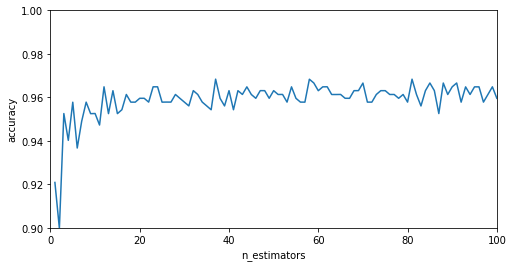

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(n_estimators, scores)

plt.xlabel("n_estimators")
plt.ylabel("accuracy")

plt.xlim(0, 100)
plt.ylim(0.9, 1)

plt.show()
print

If we look at this graph, we see that around 10 trees the graph levels out. The best model occurred at n_estimators=37 and n_estimators=59, but given how volatile it is, that was probably due to random chance. 

We should choose about 10 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance.

## Feature importance

In [31]:
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

# Scikit-learn provides a feature_importances_ variable with the model.

ft_imp = pd.Series(rf.feature_importances_, index=cancer_data.feature_names).sort_values(ascending=False)

print(ft_imp.head(10))

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64


## Model with feature selection

In [44]:
ft_top10 = ft_imp.head(10)
top_col = ft_top10.keys()
top_col

Index(['worst radius', 'mean concave points', 'worst concave points',
       'mean perimeter', 'mean radius', 'worst concavity', 'radius error',
       'mean texture', 'worst area', 'mean concavity'],
      dtype='object')

In [45]:
X_fs = df[top_col].values

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_fs, y, random_state=101)  # test_size default is 0.25

In [48]:
rf = RandomForestClassifier(n_estimators=10, random_state=101)
rf.fit(X_train, y_train)
print("decision tree accuracy:", rf.score(X_test, y_test))

decision tree accuracy: 0.972027972027972
